In [1]:
#series of tests to make sure evalf works

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf

from scipy.integrate import odeint

%load_ext autoreload
%autoreload 2


def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

### Just run it and see how we feel

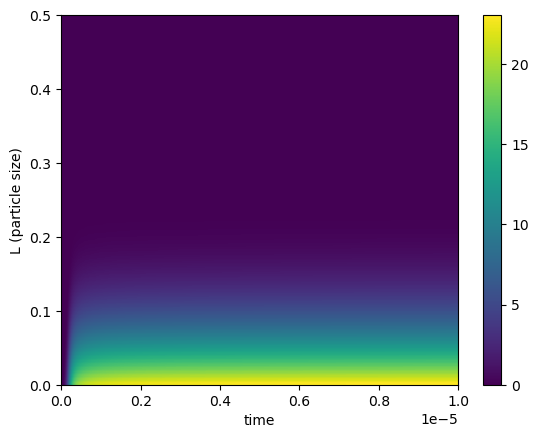

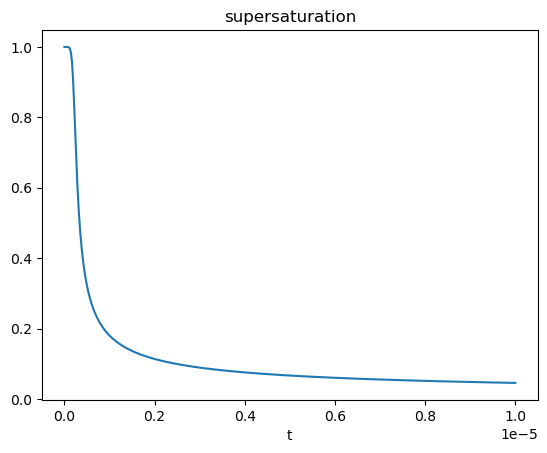

Text(0.5, 0, 't')

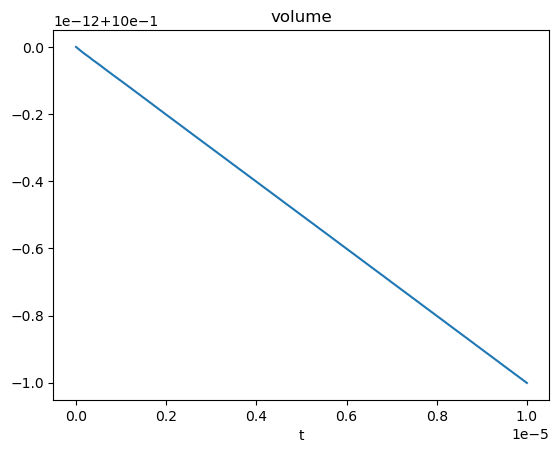

In [12]:
L_list = np.linspace(0,0.5, 100)
tlist = np.linspace(0,1e-5,1000) 


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True #toggle breakage for debug
     }


#integrate the equations
x = np.hstack([S0, V0, n0])
odeint_evalf = lambda x,t: evalf(x,p)
x_t = odeint(odeint_evalf, y0=x, t=tlist)

# x_t = odeint(evalf, y0=x, t=tlist, args=(p))


#plot results
n_t = x_t[:,2:]
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

### Bump up evaporation rate, supersaturation should increase, crystal growth should increase

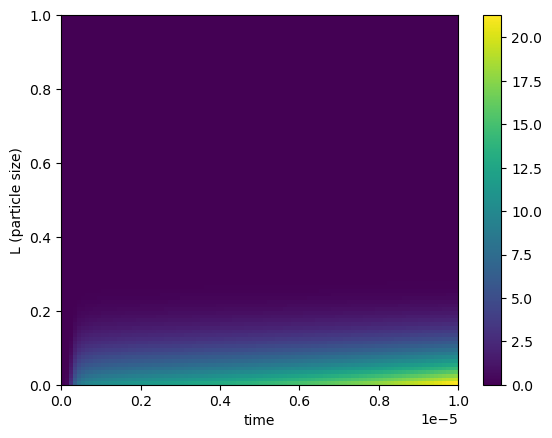

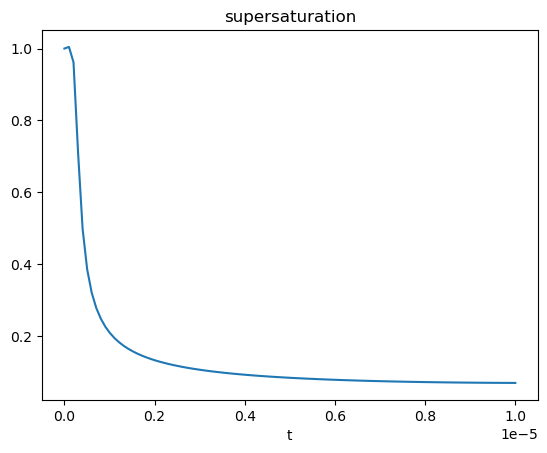

Text(0.5, 0, 't')

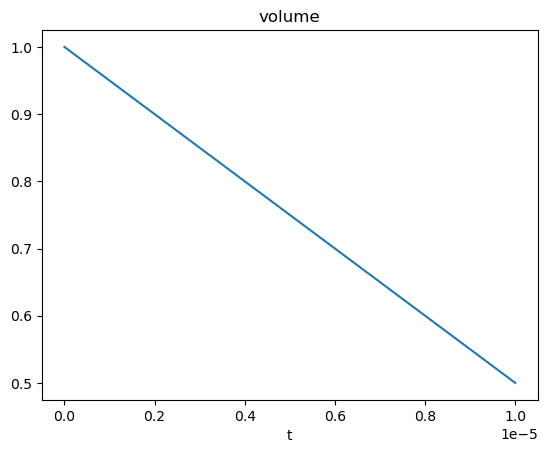

In [3]:
L_list = np.linspace(0,1, 100)
tlist = np.linspace(0,1e-5,100) 


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  5e4, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True #toggle breakage for debug
     }


#integrate the equations
x = np.hstack([S0, V0, n0])
x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))


#plot results
n_t = x_t[:,2:]
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

### decrease growth rate constant -- should require longer timescale

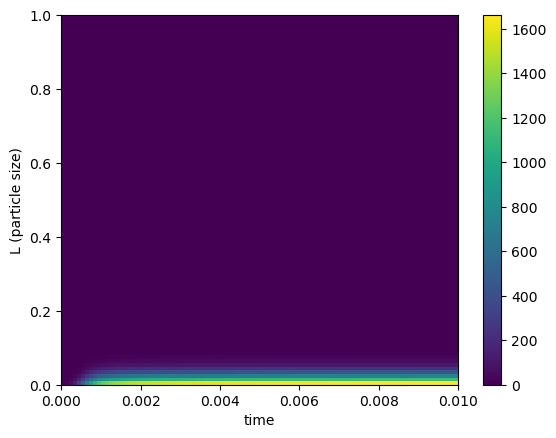

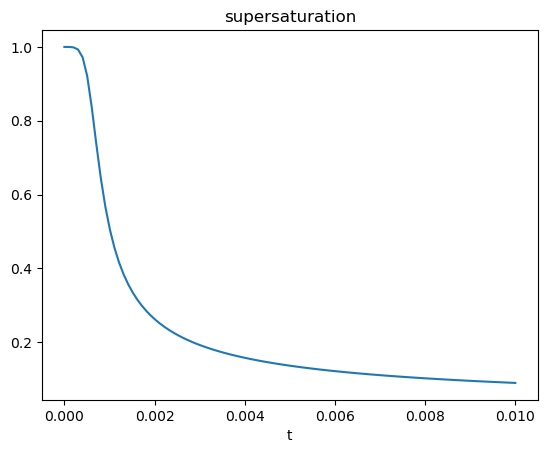

Text(0.5, 0, 't')

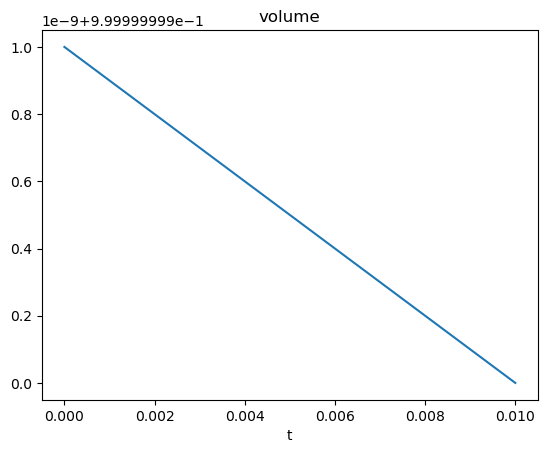

In [4]:
L_list = np.linspace(0,1, 100)
tlist = np.linspace(0,1e-2,100) 


S9 = 1 #initial supersaturation
V0 = 1
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e2, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True #toggle breakage for debug
     }


#integrate the equations
x = np.hstack([S0, V0, n0])
x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))


#plot results
n_t = x_t[:,2:]
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

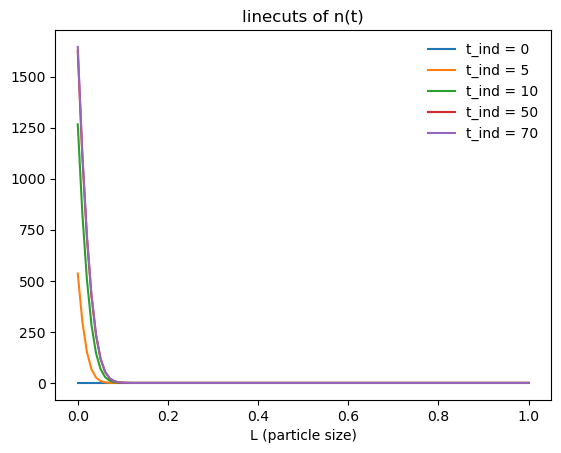

In [5]:
#linecuts

n_t = x_t[:,2:]

for t_ind in [0,5,10,50, 70]:
    plt.plot(L_list, n_t[t_ind,:], label='t_ind = '+str(t_ind))
    
plt.xlabel('L (particle size)')
plt.title('linecuts of n(t)')
plt.legend(frameon=False)